## Data Science Capstone Project : Health Care


In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import imblearn

In [2]:
# Loading the dataset

df = pd.read_csv('health care diabetes.csv')

### Data Exploration:

In [3]:
df.head() #top 5 dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail() #bottom 5 dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info() #concise information about a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape #Rows and columns

(768, 9)

In [7]:
df.describe() # statistical summary information for each numeric column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* As per descriptive analysis we see that minimum value is 0 for columns such as **Pregnancies**, **Glucose**, **SkinThickness**, **Insulin**, **BMI** etc.
* which is practically impossible so we have to treat this as null value **(NAN)** hence replace with its **median** values.

Text(0.5, 1.0, 'BMI')

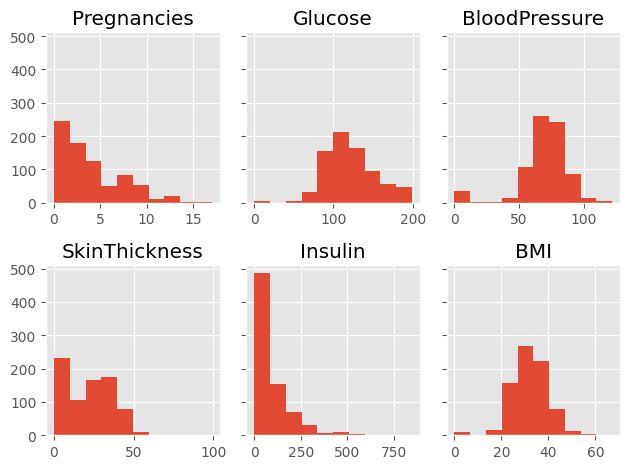

In [8]:
## Visualizations
style.use('ggplot')
fig,axs=plt.subplots(2,3,sharey=True,tight_layout=True)

axs[0,0].hist(df['Pregnancies'],bins=10)
axs[0,1].hist(df['Glucose'],bins=10)
axs[0,2].hist(df['BloodPressure'],bins=10)
axs[1,0].hist(df['SkinThickness'],bins=10)
axs[1,1].hist(df['Insulin'],bins=10)
axs[1,2].hist(df['BMI'],bins=10)

#set title
axs[0,0].set_title('Pregnancies')
axs[0,1].set_title('Glucose')
axs[0,2].set_title('BloodPressure')
axs[1,0].set_title('SkinThickness')
axs[1,1].set_title('Insulin')
axs[1,2].set_title('BMI')

In [9]:
# Treating the missing values (NAN) with the meidan(50%)

df['Pregnancies'] = df['Pregnancies'].replace(0, 3.000000)
df['Glucose'] = df['Glucose'].replace(0, 117.000000)
df['BloodPressure'] = df['BloodPressure'].replace(0, 72.000000)
df['SkinThickness'] = df['SkinThickness'].replace(0, 23.000000)
df['Insulin'] = df['Insulin'].replace(0, 30.500000)
df['BMI'] = df['BMI'].replace(0, 32.000000)

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'BMI')

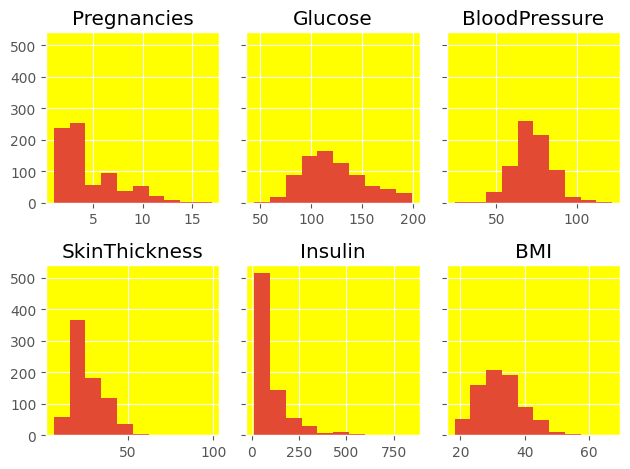

In [11]:
## Visualizations
style.use('ggplot')
fig,axs=plt.subplots(2,3,sharey=True,tight_layout=True)
for ax in axs.flat:
    ax.set_facecolor('yellow')

axs[0,0].hist(df['Pregnancies'],bins=10)
axs[0,1].hist(df['Glucose'],bins=10)
axs[0,2].hist(df['BloodPressure'],bins=10)
axs[1,0].hist(df['SkinThickness'],bins=10)
axs[1,1].hist(df['Insulin'],bins=10)
axs[1,2].hist(df['BMI'],bins=10)

#set title
axs[0,0].set_title('Pregnancies')
axs[0,1].set_title('Glucose')
axs[0,2].set_title('BloodPressure')
axs[1,0].set_title('SkinThickness')
axs[1,1].set_title('Insulin')
axs[1,2].set_title('BMI')

Text(0, 0.5, 'Count')

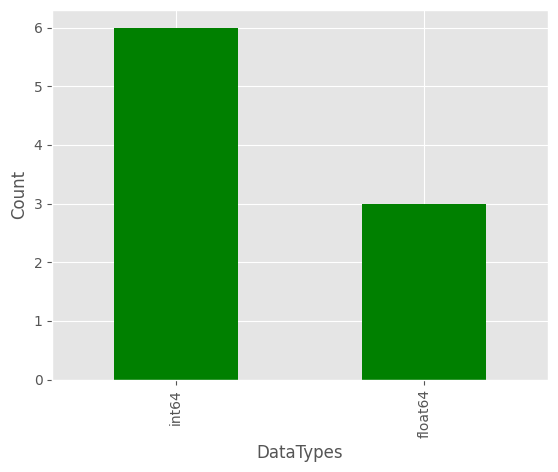

In [12]:
# Creating count(frequency) plot describing the data types and the count of variables.
style.use('ggplot')
df.dtypes.value_counts().plot(kind='bar', color='g')
plt.xlabel('DataTypes')
plt.ylabel('Count')

Text(0, 0.5, 'Total Numbers')

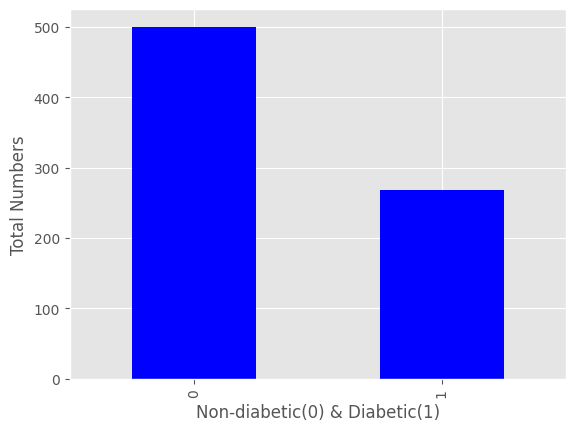

In [13]:
df['Outcome'].value_counts().plot(kind='bar', color='b')
plt.xlabel('Non-diabetic(0) & Diabetic(1)')
plt.ylabel('Total Numbers')

As we can see that there is an **imbalance** in data that means we might need to apply **SMOTE** moving forward.

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


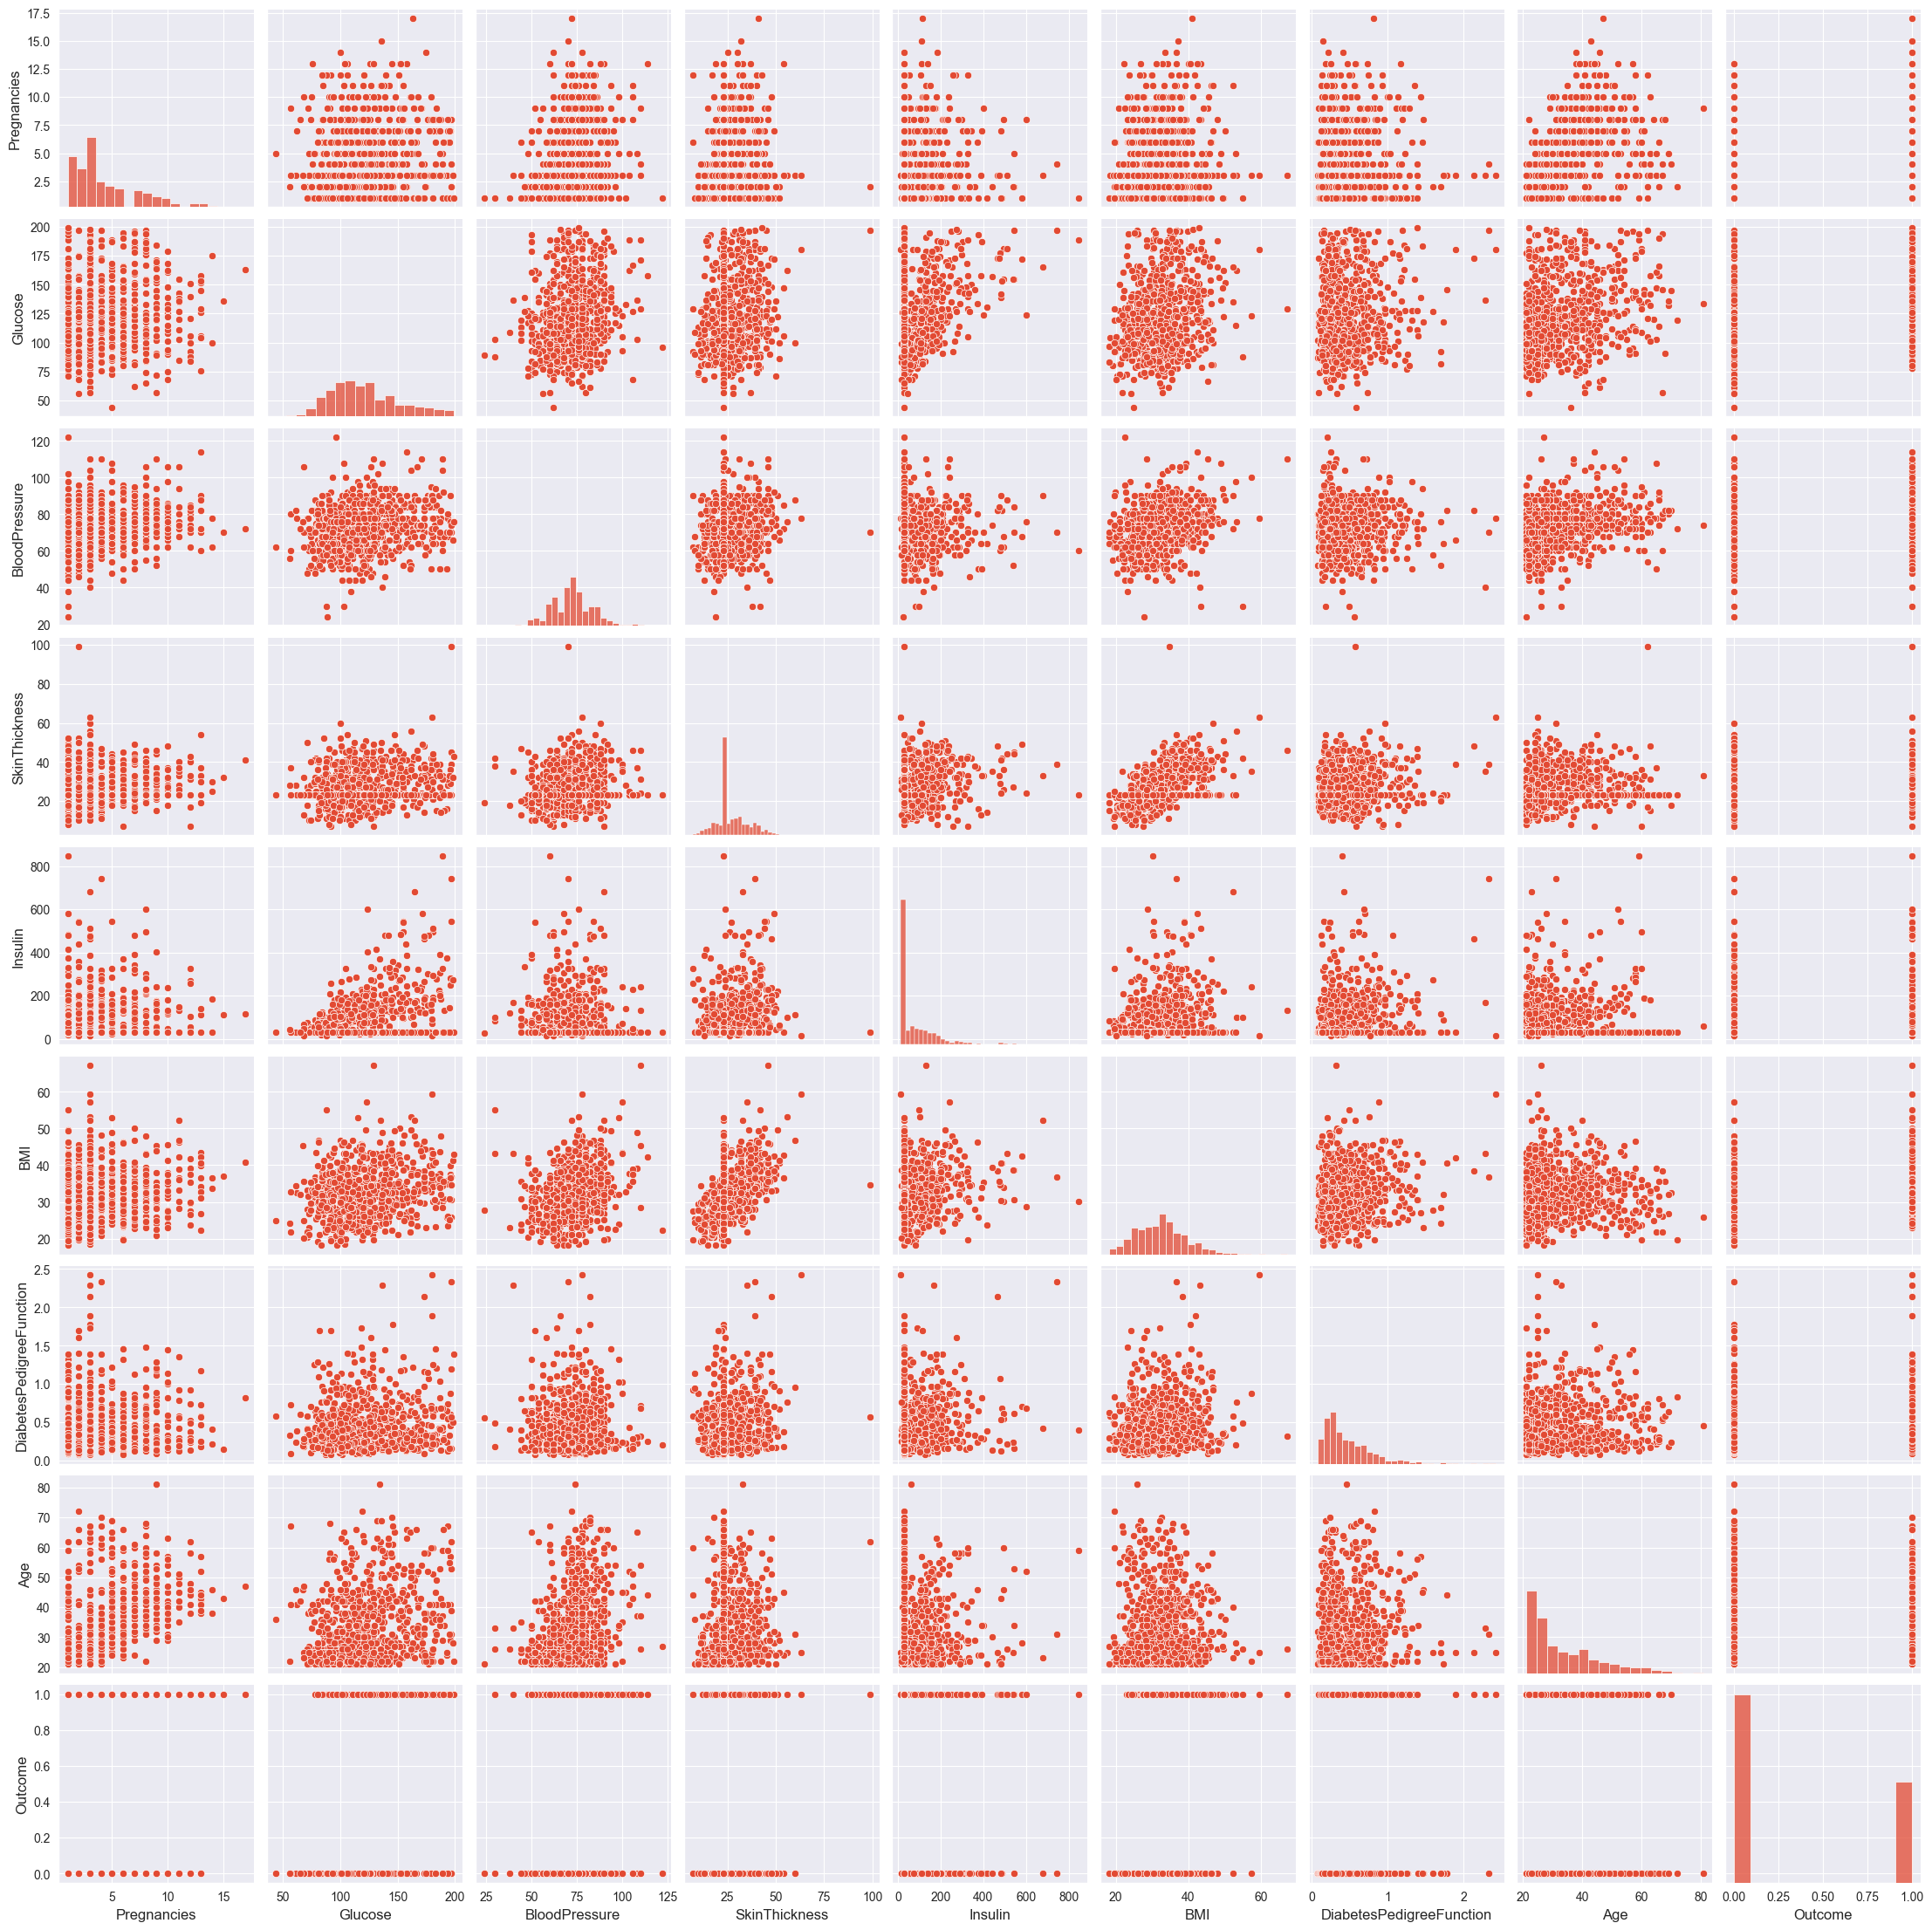

In [14]:
sns.set_style('darkgrid')
sns.pairplot(df)

In [15]:
df1=df.corr()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

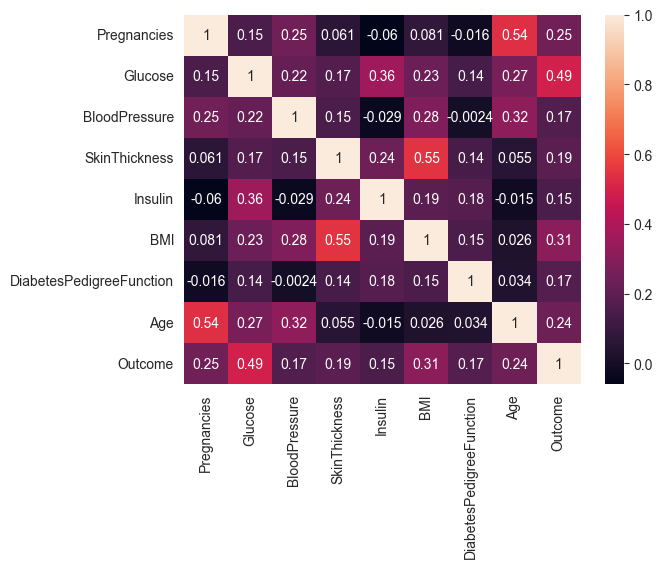

In [16]:
sns.heatmap(df.corr(),annot=True) # Plotting the heatmap

In [17]:
df1.to_csv('df_corr.csv')

In [18]:
# Seprating 'Independent' and 'Dependent' Variables.

x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [19]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [20]:
scale = StandardScaler() #Initialize the StandardScaler
x=scale.fit_transform(x)

Balancing dataset using **SMOTE**

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [22]:
X,Y=sm.fit_resample(x,y) 

In [23]:
X.shape, Y.shape

((1000, 8), (1000,))

### Data Modeling:

In [24]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Building the **Machine Learning pipeline** for different ML Classification Models like **KNN**, **logistic Regression**, **DecisionTree**, **RandomForest**, **SVM** & **NB** inorder to test multiple algorithms to see which one works best for this specific problem.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Creating a list called **model_pipeline** and appending various machine learning classifiers to it.

In [26]:
model_pipeline=[]
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(LogisticRegression())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(GaussianNB())

Importing several important **metrics and functions** from scikit-learn for **evaluating machine learning models**.

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

Creating a list of machine learning models (**model_list**) and using a list of classifiers (**model_pipeline**) to train and assess them. Evaluating metrics like **test accuracy**, **training accuracy**, **AUC**, and **confusion matrices** for each model.

In [28]:
model_list = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'GaussianNB']
test_acc_list = []
train_acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)
    test_acc_list.append(accuracy_score(Y_test, Y_pred))
    train_acc_list.append(accuracy_score(Y_train, Y_train_pred))
    fpr, tpr, _thresholds = roc_curve(Y_test, Y_pred)
    auc_list.append(round(auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))


Creating a DataFrame named **result_df** containing various metrics for different machine learning models. The DataFrame includes columns for the model names, test accuracy, training accuracy, and AUC (Area Under the ROC Curve).

In [29]:
result_df=pd.DataFrame({'model':model_list,'test_accuracy':test_acc_list,'train_accuracy':train_acc_list,'AUC':auc_list})

In [30]:
result_df

,model,test_accuracy,train_accuracy,AUC
0,Logistic Regression,0.756,0.836000,0.75
1,Decision Tree,0.752,0.761333,0.75
2,Random Forest,0.736,1.000000,0.74
3,SVM,0.784,1.000000,0.78
4,KNN,0.784,0.860000,0.78
5,GaussianNB,0.748,0.722667,0.75


We observe an instance of **overfitting** in the data, which prompts us to consider **cross-validation**. In this case, we opt for **K-Fold cross-validation**.

In this scenario, it's worth noting that **K-Nearest Neighbors (KNN)** exhibits lower accuracy compared to **Support Vector Machines (SVM)** and **Random Forest**. As a result, we decide to implement **K-Fold cross-validation** for the **Random Forest model**.

In [31]:
from sklearn.ensemble import AdaBoostClassifier
base_model = RandomForestClassifier(max_depth=2)
model = AdaBoostClassifier(base_model, n_estimators=50)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
data = {
    'Metric': ['Accuracy', 'Confusion Matrix', 'Classification Report'],
    'Result': [accuracy, conf_matrix, class_report]
}
results_df = pd.DataFrame(data)
print(results_df)

                  Metric                                             Result
0               Accuracy                                              0.744
1       Confusion Matrix                               [[89, 35], [29, 97]]
2  Classification Report                precision    recall  f1-score   ...


In [32]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       118
           1       0.77      0.73      0.75       132

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



Using the **XGBoost** library (xgboost) to build a binary classification model.

In [33]:
import xgboost as xgb
dtrain=xgb.DMatrix(X_train,label=Y_train)
params={'objective':'binary:logistic',
       'eval_metric':'logloss',
       'max_depth':3,
       'learning_rate':0.1,
       'gamma':0.2,
       'subsample':0.8,
       'colsample_bytree':0.8}

In [34]:
model=xgb.train(params,dtrain,num_boost_round=100)

In [35]:
dtest=xgb.DMatrix(X_test)

In [36]:
Y_pred_proba=model.predict(dtest)

In [37]:
Y_pred=[1 if p>=0.5 else 0 for p in Y_pred_proba]

In [38]:
acc=accuracy_score(Y_test,Y_pred)

In [39]:
acc

0.76

In summary, we have determined that **SVM** exhibits **superior accuracy** and **AUC**. Additionally, SVM stands out as the appropriate model for this dataset due to its **absence** of **overfitting issues**.